从感知机开始上手机器学习分类
感知机的特点：
- 定义权重向量，更新权重向量，决策边界就是权重向量垂直的超平面
- 只能用于线性可分

本文尝试用感知机来判断图像是横放还是竖放

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#生成模拟数据,x1长>x2宽,代表横放,x1长<x2宽,代表竖放,删除模拟数据中长宽一样的数据
# random_data=np.unique(np.random.randint(low=50,high=500,size=(500, 2)), axis=0)

# import pandas as pd
# images1=pd.DataFrame(data=random_data,columns=["x1","x2"])
# def function(a,b):
#     if a>b:
#         return 1
#     else:
#         return -1
# images1["y"] = images1.apply(lambda x: function(x.x1,x.x2),axis=1)
# images1.to_csv("data/images_random.csv", index=False)


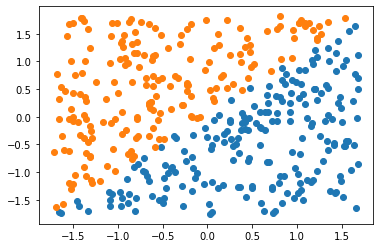

In [71]:
# 读入训练数据
# train = np.loadtxt('data/images1.csv', delimiter=',', skiprows=1)
data = pd.read_csv("data/images_random.csv")
X_raw = np.array(data.iloc[:, 0:2])
# 数据标准化


def standardize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return (X - mu) / sigma
X = standardize(X_raw)
y =  np.array(data.iloc[:, -1])



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


#绘图
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1])
plt.show()


$$
f_{w}(\boldsymbol{x})= \begin{cases}1 & (\boldsymbol{w} \cdot \boldsymbol{x} \geqslant 0) \\ -1 & (\boldsymbol{w} \cdot \boldsymbol{x}<0)\end{cases}
$$

In [74]:
# 尝试用类来写，确实写的舒服很多！所以调用类自己的函数也要用self.function吗
class Perceptron():
    def __init__(self,n):
        self.w = np.random.rand(n)

    # 判别函数
    def sign(self,x):
        if np.dot(self.w, x) >= 0:
            return 1
        else:
            return -1
    def predict(self,X):
        y_pre=[]
        for x in X:
            yi_pre=self.sign(x)
            y_pre.append(yi_pre)
        return y_pre

    def fit(self,X, y, epochs,learning_rate=0.2):
        # 更新次数
        epoch = 0
        for _ in range(epochs):
            for xi, yi in zip(X, y):
                if self.sign(xi) != yi:
                    self.w = self.w + learning_rate*yi * xi
            # 输出日志
            epoch += 1
            print(f'Epch {epoch}:w = {self.w},correct={np.sum(self.predict(X) == y)}/{y.size},rate={np.mean(self.predict(X) == y)}')
            if (self.predict(X) == y).all():
                break
        return self.w


In [78]:
model = Perceptron(n=2)
w = model.fit(X_train, y_train, epochs=1000, learning_rate=0.0001)


Epch 1:w = [0.85795387 0.10461031],correct=291/399,rate=0.7293233082706767
Epch 2:w = [0.85181298 0.09172057],correct=293/399,rate=0.7343358395989975
Epch 3:w = [0.84564789 0.07904831],correct=293/399,rate=0.7343358395989975
Epch 4:w = [0.8394828  0.06637605],correct=294/399,rate=0.7368421052631579
Epch 5:w = [0.83330212 0.05389048],correct=295/399,rate=0.7393483709273183
Epch 6:w = [0.82712144 0.04140491],correct=295/399,rate=0.7393483709273183
Epch 7:w = [0.82093523 0.02903737],correct=296/399,rate=0.7418546365914787
Epch 8:w = [0.81474146 0.01692555],correct=298/399,rate=0.7468671679197995
Epch 9:w = [0.80854443 0.00498913],correct=301/399,rate=0.7543859649122807
Epch 10:w = [ 0.80234437 -0.0066151 ],correct=301/399,rate=0.7543859649122807
Epch 11:w = [ 0.79614484 -0.01818334],correct=303/399,rate=0.7593984962406015
Epch 12:w = [ 0.78994705 -0.02965294],correct=304/399,rate=0.7619047619047619
Epch 13:w = [ 0.78375281 -0.04100132],correct=304/399,rate=0.7619047619047619
Epch 14:w = [

想不到只更新一、两次就可以了！

In [79]:
model.predict(X_train)

print(y_train)
print(model.predict(X_train))
print(model.predict(X_train)==y_train)


[ 1 -1  1  1 -1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1
 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1
  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1
 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1
  1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1
 -1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
  1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1
 -1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1
 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1
  1  1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1

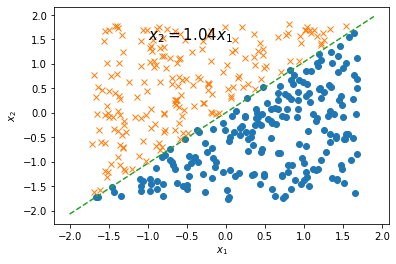

In [87]:
# 绘图确认
#
x1 = np.arange(-2, 2,0.1)
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'o')
plt.plot(X_train[y_train == -1, 0], X_train[y_train == -1, 1], 'x')
plt.plot(x1, -w[0] / w[1] * x1, linestyle='dashed')
plt.text(-1, 1.5, f"$x_2={-w[0] / w[1]:.2f}x_1$", fontsize=15)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


其实最理想的情况应该是决策边界是x2=x1，由于只根据判断数据分类正不正确来停止学习而不是让正确点离边界的距离尽可能远以及数据量不够大，因此这种感知机实现的分类很简单
有时间优化下